In [1]:
with open('trumpsSpeech.txt') as f:
    data = f.read()

In [2]:
words = data.lower().split()

In [3]:
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [4]:
dic = {}
for w in words:
    if (w not in stopwords) and len(w) > 2:
        dic[w] = dic.get(w,0) + 1

In [5]:
swd = sorted(dic.items(), key = lambda e: e[1], reverse=True)

In [19]:
swd[0:10]

[('american', 10),
 ('america', 10),
 ('again.', 8),
 ('people', 7),
 ('every', 7),
 ('one', 7),
 ('president', 6),
 ('great', 6),
 ('country', 6),
 ('back', 6)]

In [11]:
text

'President Donald Trump\'s speech after taking the oath of office lasted approximately 16 minutes. Here is the full text:\n\nChief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: Thank you.\n\nWe, the citizens of America, are now joined in a great national effort to rebuild our country and to restore its promise for all of our people.\n\nTogether, we will determine the course of America, and the world, for many, many years to come.\n\nWe will face challenges. We will confront hardships. But we will get the job done.\n\nEvery four years, we gather on these steps to carry out the orderly and peaceful transfer of power, and we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition. They have been magnificent.\n\nToday\'s ceremony, however, has very special meaning. Because today we are not merely transferring power from one administration to another, o

In [12]:
! pip install wordcloud

In [22]:
words =''
for w in swd:
    words=words+w[0]+' '

(-0.5, 399.5, 199.5, -0.5)

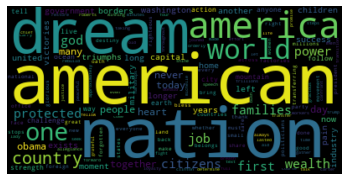

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

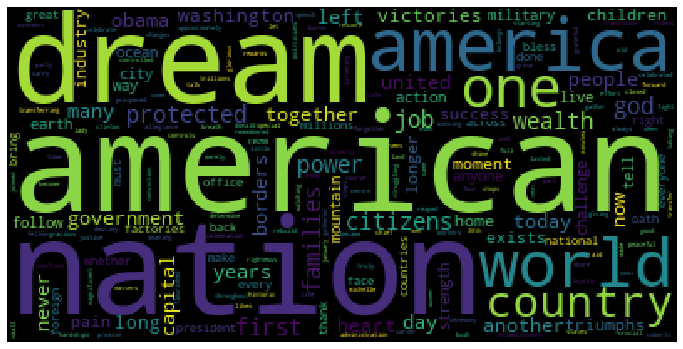

In [34]:
wc = WordCloud(
  background_color='yellow',        #   背景顏色
  max_words=200,                   #   最大分詞數量
  mask=None,                       #   背景圖片
  max_font_size=None,              #   顯示字體的最大值
  #stopwords=STOPWORDS.add(word),   #   使用內置的屏蔽詞，再添加一個
  #font_path=font_path,             #   若為中文則需引入中文字型(.TTF)
  random_state=None,               #   隨機碼生成各分詞顏色
  prefer_horizontal=0.5)
wordcloud = WordCloud().generate(words)

#plt.imshow(wordcloud, interpolation='bilinear')
#
plt.figure(
    figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")

## Speech to Text

In [8]:
#! pip install SpeechRecognition
#! conda install pyaudio -y

In [9]:
import speech_recognition as sr

def listenTo():
    r = sr.Recognizer()
    with sr.Microphone() as source:
        #print("Say something!")
        print("錄音開始:")
        audio = r.listen(source)
        print("錄音結束:")
    try:
        print('Google 語音辨識結果為:')
        ret = r.recognize_google(audio,language = 'zh-TW')
        print(ret)
        return ret
    except sr.UnknownValueError:
        print("Google 語音無法辨識")
    except sr.RequestError as e:
        print("Google 語音沒有回應: {0}".format(e))
    

In [14]:
listenTo()

錄音開始:
錄音結束:
Google 語音辨識結果為:
請問你的姓名


'請問你的姓名'

In [15]:
qa_dic = {
  '姓名': '李四四',
  '年齡': '20',
  '職業': '學生'  
}

In [17]:
qa_dic.get(listenTo(), '我聽不懂你要說甚麼')

錄音開始:
錄音結束:
Google 語音辨識結果為:
姓名


'李四四'

## Text to Speech

In [ ]:
#! pip install gTTS

In [18]:
from gtts import gTTS
tts = gTTS('hello')
tts.save('hello2.mp3')

In [ ]:
#! pip install pygame

In [23]:
from gtts import gTTS #文字轉語音
from pygame import mixer
mixer.init()

import tempfile
def speak(sentence):
    with tempfile.NamedTemporaryFile(delete=True) as fp:
        tts = gTTS(text=sentence, lang='zh-tw')
        tts.save("{}.mp3".format(fp.name))
        mixer.music.load('{}.mp3'.format(fp.name))
        mixer.music.play()

In [25]:
speak(qa_dic.get(listenTo(), '我聽不懂你要說甚麼'))

錄音開始:
錄音結束:
Google 語音辨識結果為:
年齡
